# Timing dot_real functions

This code uses the magic function `%timeit`<sup> 1 2 </sup> to measure the excetution time of functions `dot_real_dumb` , `dot_real_numpy`, `dot_real_numba` and `dot_real_parallel`.

* <sup> 1 </sup>[Profiling and Timing Code - excerpt from the Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html)

* <sup> 2 </sup>[Python documentation - timeit — Measure execution time of small code snippets](https://docs.python.org/3/library/timeit.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import functions as fcs
from tqdm.notebook import tqdm as tq # produce the progress bar

In [2]:
# number of elements forming the vectors
N = np.array([100, 300, 500, 700, 1000, 1500, 2000, 5000, 10000])

In [3]:
list_time_dumb = []
list_time_numpy = []
list_time_numba = []
list_time_parallel = []
for Ni in tq(N):
    vector = np.ones(Ni)
    # dot_real_dumb
    time = %timeit -o -n 100 -r 100 fcs.dot_real_dumb(vector, vector)
    list_time_dumb.append(time.average)
    # dot_real_numpy
    time = %timeit -o -n 100 -r 100 fcs.dot_real_numpy(vector, vector)
    list_time_numpy.append(time.average)
    # dot_real_numba
    time = %timeit -o -n 100 -r 100 fcs.dot_real_numba(vector, vector)
    list_time_numba.append(time.average)
    # dot_real_parallel
    time = %timeit -o -n 100 -r 100 fcs.dot_real_parallel(vector, vector)
    list_time_parallel.append(time.average)

81.6 µs ± 14.8 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
10.6 µs ± 545 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 3534.08 times longer than the fastest. This could mean that an intermediate result is being cached.
23.1 µs ± 224 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 197.77 times longer than the fastest. This could mean that an intermediate result is being cached.
174 µs ± 533 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
233 µs ± 26.8 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
11.6 µs ± 751 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
894 ns ± 250 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 6.77 times longer than the fastest. This could mean that an intermediate result is being cached.
118 µs ± 26.9 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
378 µs ± 25.9 µs per loop (mean ± std. dev. of 100 runs, 1

In [4]:
list_time_dumb = np.array(list_time_dumb)
list_time_numpy = np.array(list_time_numpy)
list_time_numba = np.array(list_time_numba)
list_time_parallel = np.array(list_time_parallel)

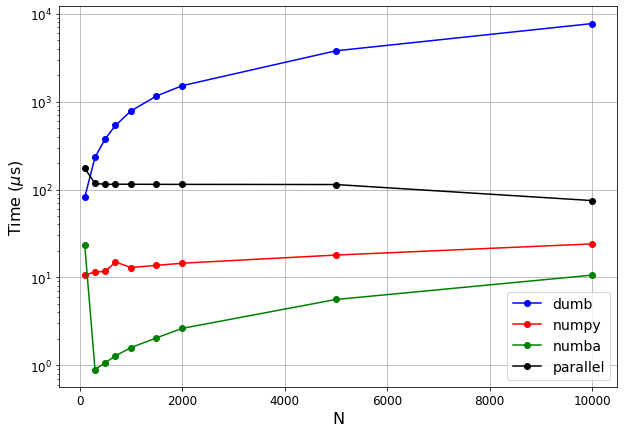

In [5]:
plt.figure(figsize=(10,7))
plt.plot(N, list_time_dumb*1e6, 'bo-', label = 'dumb')
plt.plot(N, list_time_numpy*1e6, 'ro-', label = 'numpy')
plt.plot(N, list_time_numba*1e6, 'go-', label = 'numba')
plt.plot(N, list_time_parallel*1e6, 'ko-', label = 'parallel')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()